In [15]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay)

In [16]:
final_merged_df = pd.read_csv('project_checkin_data.csv')

In [17]:
# create conditions for each time frame that may have impacted TSLA stock and market
conditions = [
    (final_merged_df['Date'].between('2020-05-15', '2021-02-15')),
    (final_merged_df['Date'].between('2022-05-01', '2023-08-01')),
    (final_merged_df['Date'].between('2022-03-01', '2023-03-01'))
]

choices = ['Covid Lockdown', 'Inflation Rise', 'Fed Rate Increase']

final_merged_df['Market_Event'] = np.select(conditions, choices, default='Other')

In [18]:
event_data = final_merged_df[final_merged_df['Market_Event'] != 'Other']

# calculate standard deviation
volatility = event_data.groupby('Market_Event')[['TSLA_Return', 'GSPC_Return']].std()
print(volatility)

                   TSLA_Return  GSPC_Return
Market_Event                               
Covid Lockdown        2.843574     0.651192
Fed Rate Increase     5.557255     1.850974
Inflation Rise        3.567053     1.547149


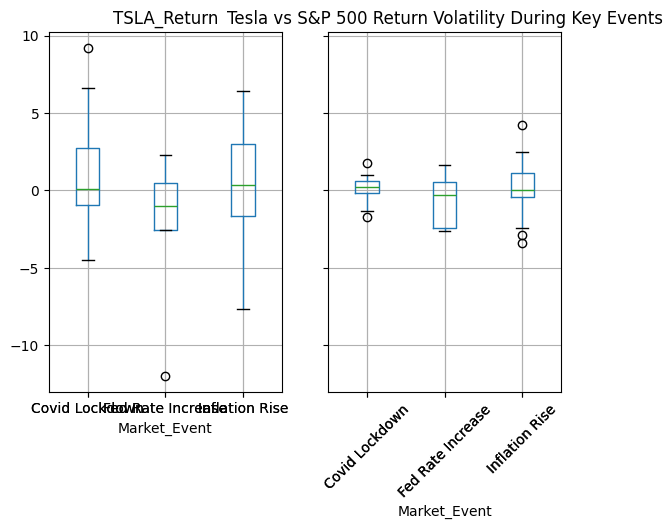

In [19]:
# create boxplots to see the spread of returns for the time periods
final_merged_df[final_merged_df['Market_Event'] != 'Other'].boxplot(column=['TSLA_Return', 'GSPC_Return'], by='Market_Event')

plt.xticks(rotation=45)
plt.title('Tesla vs S&P 500 Return Volatility During Key Events')
plt.suptitle('')
plt.ylabel('Daily Return (%)')
plt.show()

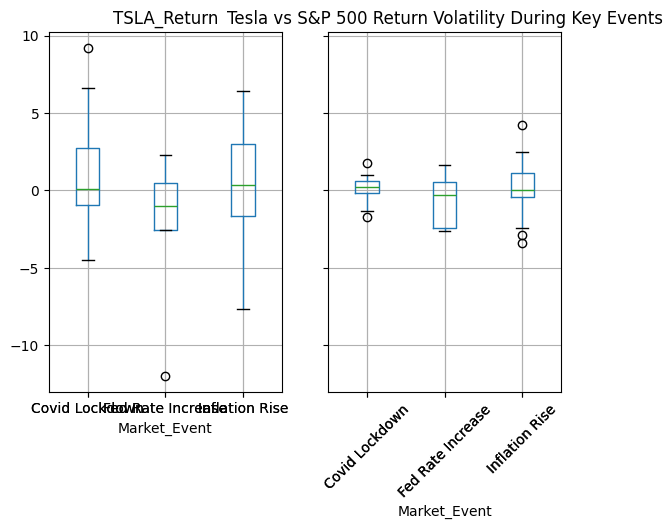

In [20]:
# create boxplots to see the spread of returns for the time periods
final_merged_df[final_merged_df['Market_Event'] != 'Other'].boxplot(column=['TSLA_Return', 'GSPC_Return'], by='Market_Event')

plt.xticks(rotation=45)
plt.title('Tesla vs S&P 500 Return Volatility During Key Events')
plt.suptitle('')
plt.ylabel('Daily Return (%)')
plt.show()

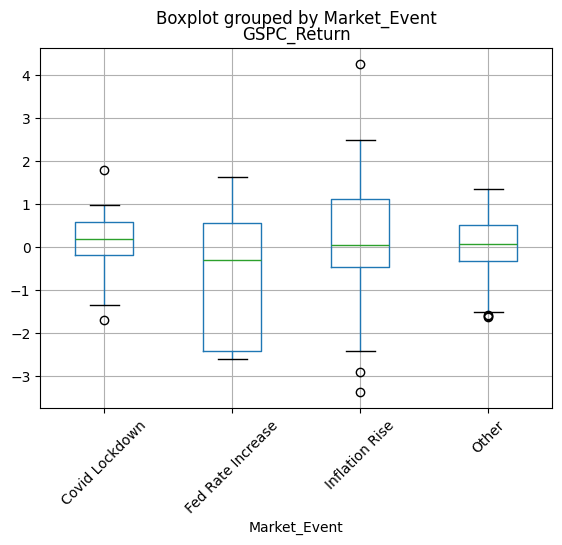

In [21]:
final_merged_df.boxplot(column='GSPC_Return', by='Market_Event')
plt.xticks(rotation=45)
plt.show()